'''
 This project utilizes supervised learning models to identify 
 customers who are likely to cancel service in the near future.
 Also, extract and analyze top factors that contribute to user retention
'''


### Part 1 - Data Exploration 

#### 1.1 Load & understand the dataset

In [21]:
import pandas as pd
import numpy as np
import imblearn
import warnings
warnings.filterwarnings('ignore')

# to show all the columns
pd.set_option('display.max_columns', None)

data = pd.read_csv('../data/churn.all')
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [22]:
# shape of the dataset
print('number of rows: {} and columns: {}'.format(data.shape[0], data.shape[1]))

number of rows: 5000 and columns: 21


#### 1.2 Data cleaning

In [23]:
# remove unnecessary whitespaces among features that we are about to use
print('before:' + str(data['voice_mail_plan'][0]))
print('before:' + str(data['intl_plan'][0]))
print('before:' + str(data['churned'][0]))

before: yes
before: no
before: False.


In [24]:
# print(data['voice_mail_plan'])

In [25]:
# remove heading and trailing whitespaces
data['voice_mail_plan'] = data['voice_mail_plan'].map(lambda x : x.strip())
data['intl_plan'] = data['intl_plan'].map(lambda x : x.strip())
data['churned'] = data['churned'].map(lambda x : x.strip())

In [26]:
print('after:' + str(data['voice_mail_plan'][0]))
print('after:' + str(data['intl_plan'][0]))
print('after:' + str(data['churned'][0]))

after:yes
after:no
after:False.


#### 1.3 Explore features

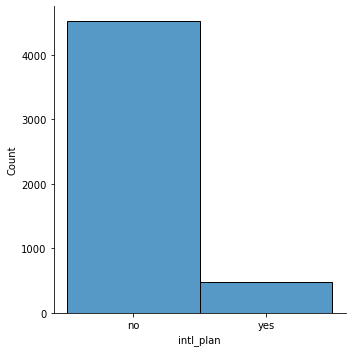

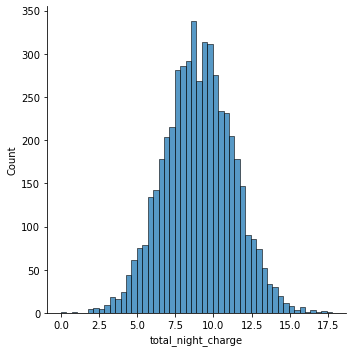

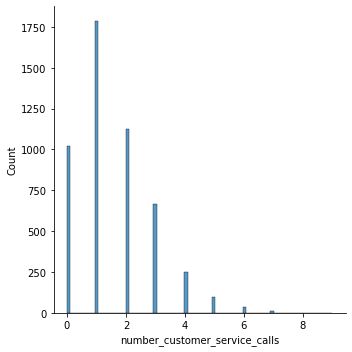

In [28]:
# plot feature values to show distribution
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(data['intl_plan'])
sns.displot(data['total_night_charge'])
sns.displot(data['number_customer_service_calls'])

<AxesSubplot:>

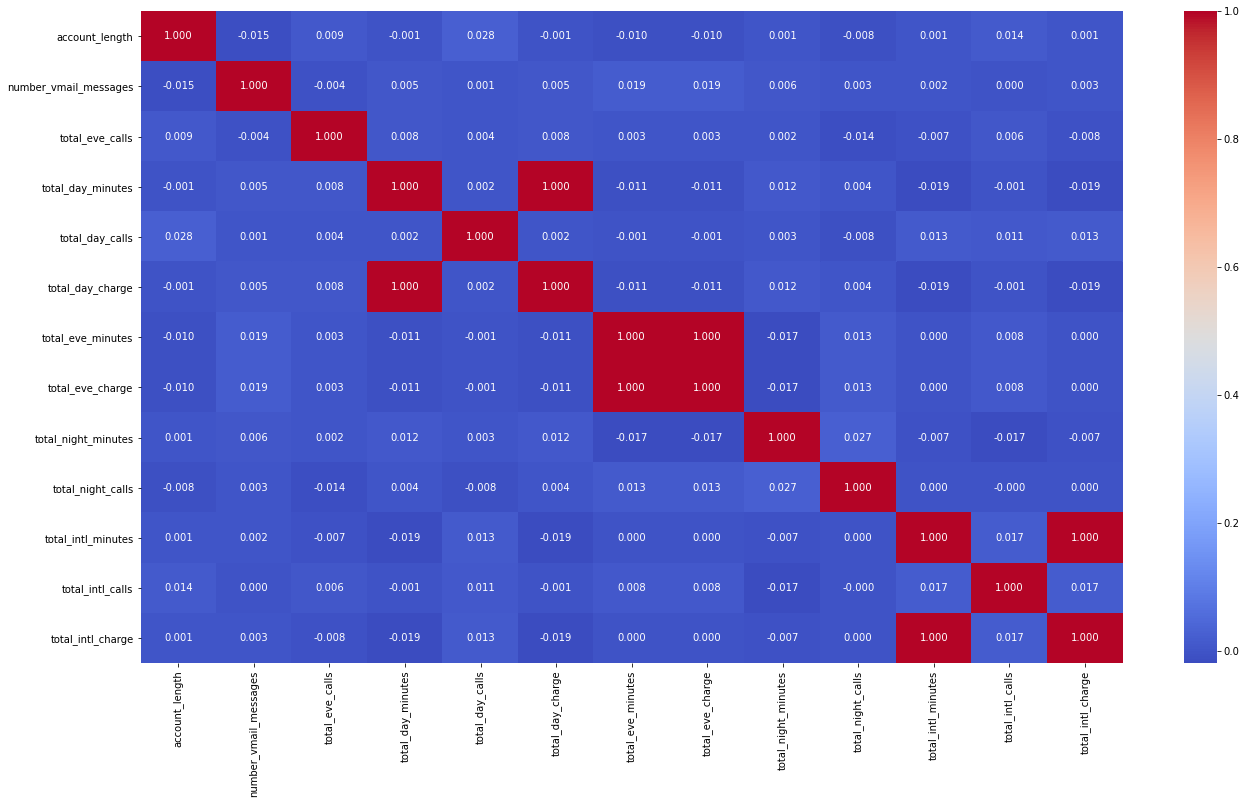

In [65]:
# calculate the Pearson correlations between all continuous features
pcorr = data[["account_length", "number_vmail_messages", "total_eve_calls", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                     "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge"]].corr()
# print(pcorr)
fig, ax = plt.subplots(figsize=(22,12))
sns.heatmap(pcorr, annot=True, fmt=".3f", cmap="coolwarm", ax=ax)

### Part 2 - Feature Preprocessing

In [34]:
# calculate pearson correlation between two features
from scipy.stats import pearsonr
# linear correlation
print (pearsonr(data['total_intl_minutes'], data['total_intl_charge'])[0])
# no linear correlation
print (pearsonr(data['total_intl_minutes'], data['total_night_calls'])[0])

0.9999926570208368
0.0003907572996283259


In [47]:
# get true Y output - ground truth
Y = np.where(data['churned'] == 'True.', 1, 0)

# drop unnecessary features
data_train = data.drop(['state','area_code','phone_number','churned'], axis = 1)

# convert categorical features into boolean values
data_train[["intl_plan","voice_mail_plan"]] = data_train[["intl_plan","voice_mail_plan"]] == 'yes'
X = data_train

In [48]:
#print(X_train)

In [49]:
# check the propotion of churned customers
print('{}%'.format((Y.sum() / Y.shape * 100)[0]))

14.14%


In [53]:
X.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [54]:
# Encode and add categorical features (state)
data_encode_add = data.drop(['area_code', 'phone_number', 'churned'], axis = 1)

# convert categorical features into boolean values
data_encode_add[['intl_plan', 'voice_mail_plan']] = data_encode_add[['intl_plan', 'voice_mail_plan']] == 'yes'

# encode feature
data_encode_add = pd.get_dummies(data_encode_add, columns=['state'])

data_encode_add.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Part 3 : Model Training and Evaluation
#### 3.1 Split data

In [59]:
# train & test split
from sklearn.model_selection import train_test_split

# 25% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

print('training data has %d rows and %d columns' % X_train.shape)
print('testing data has %d rows and %d columns' % X_test.shape)

training data has 3750 rows and 17 columns
testing data has 1250 rows and 17 columns


In [60]:
# data normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### 3.2 Model selection

In [67]:
# evaluate and compare the different classifiers using cross-validated ROC-AUC 
from xgboost import  XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


    CV mean    CV std         Classifiers
0  0.910164  0.012292                 SVC
1  0.913549  0.018490        RandomForest
2  0.861596  0.033340            AdaBoost
3  0.915992  0.024136    GradientBoosting
4  0.835739  0.015323         KNeighboors
5  0.825327  0.018453  LogisticRegression
6  0.920703  0.019690             XGBoost


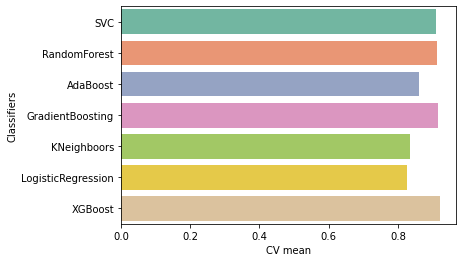

In [78]:
# building a K-fold cross validation
kfold_cv = StratifiedKFold(n_splits=5)
random_state = 55
clfs = [SVC(random_state=random_state), 
      RandomForestClassifier(random_state=random_state),
      AdaBoostClassifier(n_estimators=100, random_state=random_state, learning_rate=0.5),
      GradientBoostingClassifier(random_state=random_state),
      KNeighborsClassifier(),
      LogisticRegression(random_state=random_state),
      XGBClassifier(random_state=random_state)]

cv_means = []
cv_std = []
for clf in clfs:
    cv_results = cross_val_score(clf, X_train, Y_train, scoring="roc_auc", cv = kfold_cv)
    cv_means.append(cv_results.mean())
    cv_std.append(cv_results.std())
    
cv_res = pd.DataFrame({"CV mean":cv_means,"CV std": cv_std,"Classifiers":["SVC","RandomForest","AdaBoost",
"GradientBoosting","KNeighboors","LogisticRegression","XGBoost"]})

sns.set_palette("Set2")
graph = sns.barplot(x='CV mean', y='Classifiers', data= cv_res, orient='h')
print(cv_res)